In [22]:
# importing neccessary packages
import pandas as pd
import numpy as np
from datetime import date,datetime
import matplotlib.pyplot as plt

In [23]:
# importing dataset
df=pd.read_csv(r"C:\Users\Zachary_B\Desktop\dataset\DatasetNexusTech_ Customer Data.csv")

In [24]:
# Return the first five number of rows.
df.head()

Submitted First Name   Last Name               Email Address  \
0  12/05/2022 15:06    Miracle     Obiekwe    miracleobiekwe@yahoo.com   
1  06/04/2022 20:41   Ibilola    Shobanke       lolashobanke@gmail.com   
2  06/04/2022 12:22   Damilola       Oseni   dammygeorge5050@gmail.com   
3  06/04/2022 09:30      Kabir  Salawudeen  salawudeenkabeer@gmail.com   
4  05/04/2022 14:40    Bashir      Hussain        uniquebash@gmail.com   

   Gender Marital Status Converted Sponsored/Self Sponsored     Location  \
0    Male         Single        NO                      NaN  Enugu State   
1  Female        Married        NO                      NaN    Oyo State   
2  Female        Married       Yes                Sponsored          FCT   
3    Male        Married        NO                      NaN          FCT   
4    Male        Married        NO                      NaN          FCT   

                                      Postal Address  ...  \
0  <p>Nigeria prisons barracks enugu state comman...  ...   
1     <p>3 Fafunlayo Layout, Iwo Road, Ibadan </p>\n  ...   
2  <p>1 EMMANUEL NTUK, GOSHEN VILLA ESTATE, LUGBE...  ...   
3           <p>23, Angwar Siyawa Abuja Nigeria</p>\n  ...   
4  <p>Plot 785 Herbert Macaulay Way, CBD Abuja</p>\n  ...   

             Programme of Interest          Level of IT Experience  \
0                     Data Science    Intermediate ( 2 - 5 years )   
1                   Data Analytics        Beginner ( 0 - 2 years )   
2                   Data Analytics        Beginner ( 0 - 2 years )   
3  Full-Stack Software Development  Advanced ( 5 years and above )   
4                   Data Analytics  Advanced ( 5 years and above )   

  What is your main motivation for enrolling in the programme?  \
0  <p>That I can do all things through Christ tha...             
1  <p>For self development and to increase my cha...             
2                                <p>Knowledge </p>\n             
3  <p>One of your student got a good and well pay...             
4     <p>To start a career path on technology </p>\n             

  What are the challenges you've experienced while trying to meet the above stated goal(s)?  \
0  <p>Coding is my challenge.. I have tried it be...                                          
1                                       <p>N/A</p>\n                                          
2  <p>Fear of failing<br />\nBudget<br />\nLack o...                                          
3  <p>Network challenges and at times work relate...                                          
4                                 <p>Interest </p>\n                                          

  What can we do to help you overcome these challenges?  \
0     <p>I need maximum attention and guidance</p>\n      
1                                       <p>N/A</p>\n      
2       <p>Give Feedbacks on how I can improve</p>\n      
3  <p>If I can have a full knowledge in becoming ...      
4                                <p>Enrolment </p>\n      

  Employment Preferences Monthly Salary Expectations (in Naira)  \
0     Foreign Employment                             2.5million   
1     Foreign Employment                             N2,000,000   
2       Local Employment                                100,000   
3     Foreign Employment                             300,000.00   
4     Foreign Employment                             500,000.00   

      What is your short term (2 years) career goal?  \
0  <p>To be a consultant in the field of data sci...   
1  <p>Becoming a genius in data analytics and hav...   
2  <p>Successful implementation of what I have le...   
3  <p>1.Earn a new certificate or degree.<br />\n...   
4  <p>To obtain basic certification on technology...   

    What is your mid-term (2 - 5 years) career goal?  \
0  <p>Empowering children from the street to stud...   
1  <p>To become diverse in the other aspects of t...   
2                <p>To work in an organization</p>\n   
3                 <p>Start a pers

In [25]:
# Use df.columns command to drop columns via indexing
df = df.drop(df.columns[[0,3,9,12,13,14,15,16,17,23,24,25,27,28,29,30]], axis=1)

In [26]:
df.isnull().sum()

First Name                  0
Last Name                   0
Gender                      0
Marital Status              0
Converted                   0
Sponsored/Self Sponsored    8
Location                    0
Employment Status           0
Personal Interests          0
Date of Birth               0
Education                   0
Profession                  1
Programme of Interest       0
Level of IT Experience      0
Employment Preferences      4
dtype: int64

In [27]:
df.columns

Index(['First Name', 'Last Name', 'Gender', 'Marital Status', 'Converted',
       'Sponsored/Self Sponsored', 'Location', 'Employment Status',
       'Personal Interests', 'Date of Birth', 'Education', 'Profession',
       'Programme of Interest', 'Level of IT Experience',
       'Employment Preferences'],
      dtype='object')

In [28]:
df['Personal Interests'] = df['Personal Interests'].str.replace(r'</p>|<p>|\n', '',regex = True)

In [29]:
df['Education'] = df['Education'].replace('Bachelor&#039;s Degree', 'Bachelors')

In [30]:
df['Programme of Interest'] = df['Programme of Interest'].replace('Data Analytics', 'Data Science')

In [31]:
from datetime import date,datetime

def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
df['Age'] = df['Date of Birth'].apply(age)
  


In [32]:
df['Prospect_ID'] = [ 'DS1', 'DS2', 'DS3','DS4','DS5','DS6','DS7','DS8','DS9','DS10','DS11','DS12','DS13','DS14','DS15','DS16','DS17','DS18',
                     'DS19','DS20','DS21','DS22','DS23','DS24','DS25','DS26']

In [90]:
df['Churn'] = df['Converted'].apply(lambda x: 1 if x == 'Yes' else 0)

In [91]:
df.head()

First Name   Last Name  Gender Marital Status Converted  \
0    Miracle     Obiekwe    Male         Single        NO   
1   Ibilola    Shobanke   Female        Married        NO   
2   Damilola       Oseni  Female        Married       Yes   
3      Kabir  Salawudeen    Male        Married        NO   
4    Bashir      Hussain    Male        Married        NO   

  Sponsored/Self Sponsored     Location               Employment Status  \
0                      NaN  Enugu State  Self employed / Business Owner   
1                      NaN    Oyo State                        Employed   
2                Sponsored          FCT                        Employed   
3                      NaN          FCT                        Employed   
4                      NaN          FCT                        Employed   

               Personal Interests Date of Birth  Education        Profession  \
0                    Data science    22/06/1995  Bachelors  Computer science   
1           Technology, Business     09/07/1984    Masters        Lecturing    
2                        Business    21/08/1990  Bachelors        Biochemist   
3                      Technology    01/01/1990        HND  Computer Science   
4  Technology, Sports and Travels    14/05/1980  Bachelors          Banking    

             Programme of Interest          Level of IT Experience  \
0                     Data Science    Intermediate ( 2 - 5 years )   
1                     Data Science        Beginner ( 0 - 2 years )   
2                     Data Science        Beginner ( 0 - 2 years )   
3  Full-Stack Software Development  Advanced ( 5 years and above )   
4                     Data Science  Advanced ( 5 years and above )   

  Employment Preferences  Age Prospect_ID  Churn  
0     Foreign Employment   27         DS1      0  
1     Foreign Employment   38         DS2      0  
2       Local Employment   32         DS3      1  
3     Foreign Employment   32         DS4      0  
4     Foreign Employment   42         DS5      0

In [35]:
# We can use the following code to get the total number of customers who have responded
df.groupby('Converted').count()['Prospect_ID']

Converted
NO      8
Yes    18
Name: Prospect_ID, dtype: int64

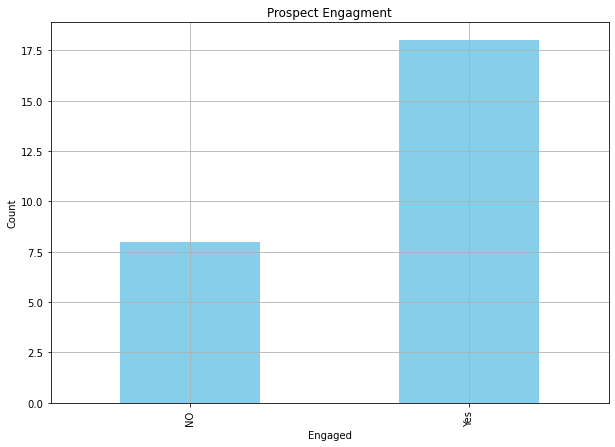

In [36]:
# In order to visualize the above in a plot, you can use the following code:


ax = df.groupby('Converted').count()['Prospect_ID'].plot(
kind='bar',
color='skyblue',
grid=True,
figsize=(10, 7),
title='Prospect Engagment'
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()


In [37]:
# We can use the following code to get the percentage of customers who have responded
df.groupby('Converted').count()['Prospect_ID']/df.shape[0]*100

Converted
NO     30.769231
Yes    69.230769
Name: Prospect_ID, dtype: float64

In [40]:
# we are going to look into what types of offers worked best for the engaged customers. Take a look at the following code:

by_Programme_of_Interest_df = df.loc[df['Converted'] == 'Yes'].groupby(['Programme of Interest']).count()['Prospect_ID'] / df.groupby('Programme of Interest').count()['Prospect_ID']*100

In [41]:
by_Programme_of_Interest_df

Programme of Interest
Data Science                       75.0
Full-Stack Software Development    50.0
Name: Prospect_ID, dtype: float64

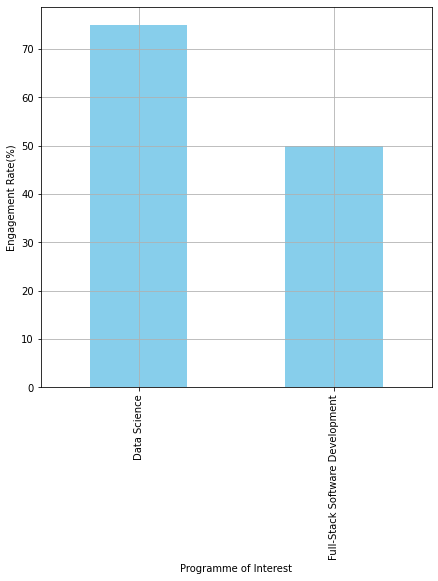

In [43]:
# We can visualize these results in a bar plot, using the following code:
ax = (by_Programme_of_Interest_df).plot(
kind='bar',
figsize=(7, 7),
color='skyblue',
grid=True
)
ax.set_ylabel('Engagement Rate(%)')
plt.show()

In [44]:
#We are going to look at the engagement rates by programme of interst and employment status using the following code

by_employment_status_df = df.loc[df['Converted'] == 'Yes'].groupby(['Programme of Interest', 'Employment Status']).count()['Prospect_ID']/df.groupby('Programme of Interest').count()['Prospect_ID']*100

In [45]:
by_employment_status_df

Programme of Interest            Employment Status             
Data Science                     Employed                          35.000000
                                 Self employed / Business Owner    10.000000
                                 Unemployed                        30.000000
Full-Stack Software Development  Self employed / Business Owner    16.666667
                                 Unemployed                        33.333333
Name: Prospect_ID, dtype: float64

In [46]:
# To make this more readable, we can transform this data by using the followingcode
by_employment_status_df = by_employment_status_df .unstack().fillna(0)

In [47]:
by_employment_status_df.T

Programme of Interest           Data Science  Full-Stack Software Development
Employment Status                                                            
Employed                                35.0                         0.000000
Self employed / Business Owner          10.0                        16.666667
Unemployed                              30.0                        33.333333

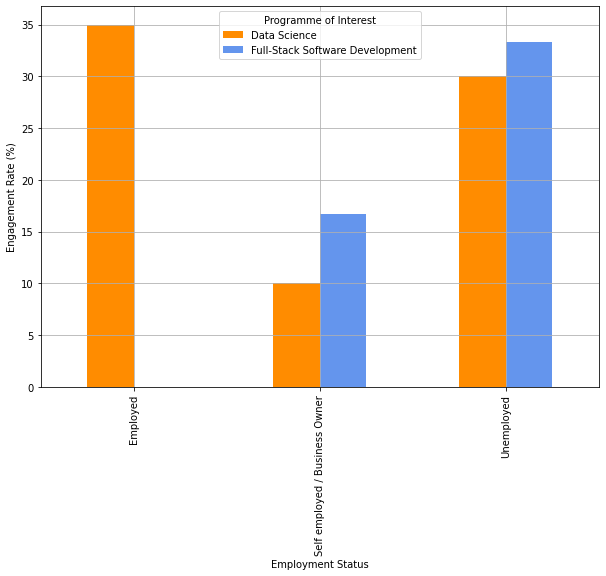

In [50]:
# We can visualize this data as a bar plot, using thefollowing code

ax = (by_employment_status_df.T).plot(
kind='bar',
figsize=(10, 7),
color=('darkorange', 'cornflowerblue'),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.xticks(label = ['Employed', 'Self Employed', 'Unemployed'])
plt.show()


In [73]:
df['Profession']

0                       Computer science
1                             Lecturing 
2                             Biochemist
3                       Computer Science
4                               Banking 
5              Project Manager/ IT Audit
6                           Engineering 
7                      Software engineer
8                 Clinical Administrator
9                                 Lawyer
10    Administrative and Finance Officer
11                         Administrator
12               Self employed/ business
13       Accountant/Financial Economist 
14                          Entrepreneur
15                        Public officer
16                          Data science
17                    Mass communication
18                                   NaN
19                         Data science 
20                     Computer science 
21                     Computer Science 
22                  Industrial Chemistry
23                     Computer science 
24              

In [76]:
df['Employment Preferences']

0     Foreign Employment
1     Foreign Employment
2       Local Employment
3     Foreign Employment
4     Foreign Employment
5     Foreign Employment
6     Foreign Employment
7      Remote Employment
8     Foreign Employment
9      Remote Employment
10    Foreign Employment
11    Foreign Employment
12    Foreign Employment
13    Foreign Employment
14                   NaN
15                   NaN
16     Remote Employment
17     Remote Employment
18     Remote Employment
19     Remote Employment
20    Foreign Employment
21     Remote Employment
22     Remote Employment
23     Remote Employment
24                   NaN
25                   NaN
Name: Employment Preferences, dtype: object

In [86]:
# We will analyze how engagement rates differ by different sales channels. Take a look at the following code:
by_E_Preferences_df = df.loc[df['Converted'] == 'Yes'].groupby(['Employment Preferences']).count()['Prospect_ID']/df.groupby('Employment Preferences').count()['Prospect_ID']*100
by_E_Preferences_df

Employment Preferences
Foreign Employment     50.000000
Local Employment      100.000000
Remote Employment      77.777778
Name: Prospect_ID, dtype: float64

In [87]:
by_E_Preferences_df = pd.DataFrame(by_E_Preferences_df)

In [88]:
#we can unstack this data into a more visible format, using the following code:

by_E_Preferences_df = by_E_Preferences_df.unstack().fillna(0)

by_E_Preferences_df   #.set_index('Vehicle Size')

             Employment Preferences
Prospect_ID  Foreign Employment         50.000000
             Local Employment          100.000000
             Remote Employment          77.777778
dtype: float64

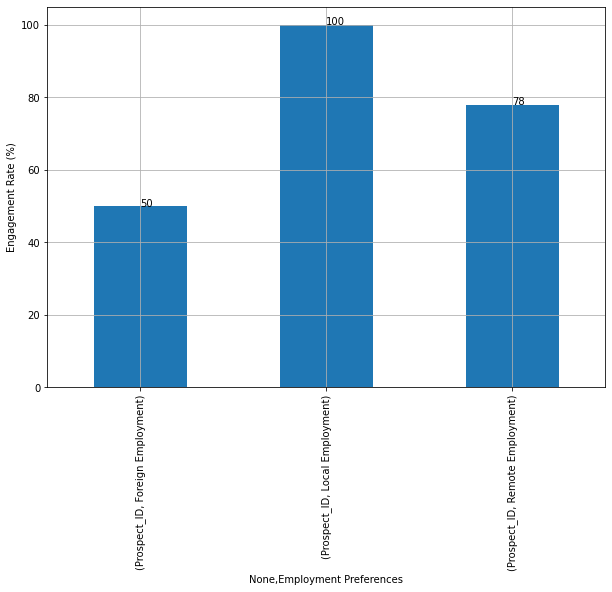

In [89]:
#We can visualize the above results into a bar chart, using the following code:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["Foreign Employment", "Local Employment", "Remote Employment",]
    y = [50, 100, 78]
addlabels(x, y)   

ax = (by_E_Preferences_df).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Engagement Rate (%)')
plt.show()